In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



1.   Standardized the edge detection data using MinMaxScaler
2.   Combined my csv with statistics csv

1.   Random Forest Feature Importance to select most important features

2.   Information Gain to select most important features

5.   Experimented with SVD








In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import exposure
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/edge_feature_combined.csv', index_col=0)

In [ ]:
df

,Bins_1,Bins_2,Bins_3,Bins_4,Bins_5,Bins_6,Bins_7,Bins_8,Bins_9,Bins_10,...,Bins_sobel56,Bins_sobel57,Bins_sobel58,Bins_sobel59,Bins_sobel60,Bins_sobel61,Bins_sobel62,Bins_sobel63,Bins_sobel64,label
0,96,148,112,121,103,122,106,102,92,106,...,5,2,1,2,0,0,1,1,1,2.0
1,3,2,37,94,101,182,228,331,235,306,...,0,1,0,1,0,0,1,0,1,2.0
2,20,25,14,30,65,103,132,100,97,184,...,0,6,2,3,4,2,4,6,3,0.0
3,3,5,9,35,81,84,57,77,62,79,...,1,2,0,0,0,2,0,1,1,0.0
4,7,25,223,502,472,645,674,583,258,219,...,0,1,0,1,2,0,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,6,18,91,154,184,338,413,455,407,271,...,2,1,1,2,1,2,1,1,2,2.0
7559,55,30,56,171,197,189,174,199,189,210,...,9,5,10,1,5,0,0,2,1,0.0
7560,4,1,2,4,7,13,46,114,234,248,...,3,6,3,1,0,0,0,0,1,0.0
7561,60,133,192,193,164,159,136,116,159,218,...,3,1,1,0,1,1,1,1,1,2.0


In [ ]:
mms = MinMaxScaler()
edge_feature_for_X=df.iloc[:,:-1]
edge_feature_for_y = df.iloc[:, -1]

In [ ]:
Data_minmax = mms.fit_transform(edge_feature_for_X)
edge_feature_for_X = pd.DataFrame(data=Data_minmax,
                           columns=edge_feature_for_X.columns)
edge_feature_for_X.head(5)

,Bins_1,Bins_2,Bins_3,Bins_4,Bins_5,Bins_6,Bins_7,Bins_8,Bins_9,Bins_10,...,Bins_sobel55,Bins_sobel56,Bins_sobel57,Bins_sobel58,Bins_sobel59,Bins_sobel60,Bins_sobel61,Bins_sobel62,Bins_sobel63,Bins_sobel64
0,0.015075,0.046351,0.042569,0.030070,0.029692,0.049055,0.056624,0.040189,0.034678,0.040473,...,0.090909,0.151515,0.055556,0.022222,0.057143,0.000000,0.000000,0.01,0.013699,0.000000
1,0.000317,0.000626,0.014063,0.023360,0.029115,0.073181,0.121795,0.130418,0.088579,0.116838,...,0.000000,0.000000,0.027778,0.000000,0.028571,0.000000,0.000000,0.01,0.000000,0.000000
2,0.003015,0.007830,0.005321,0.007455,0.018737,0.041415,0.070513,0.039401,0.036562,0.070256,...,0.151515,0.000000,0.166667,0.044444,0.085714,0.044944,0.023529,0.04,0.082192,0.025316
3,0.000317,0.001566,0.003421,0.008698,0.023350,0.033776,0.030449,0.030339,0.023370,0.030164,...,0.030303,0.030303,0.055556,0.000000,0.000000,0.000000,0.023529,0.00,0.013699,0.000000
4,0.000952,0.007830,0.084759,0.124751,0.136062,0.259349,0.360043,0.229708,0.097248,0.083620,...,0.090909,0.000000,0.027778,0.000000,0.028571,0.022472,0.000000,0.00,0.013699,0.000000


In [ ]:
df = pd.concat([edge_feature_for_X, edge_feature_for_y],axis=1)

In [ ]:
df

,Bins_1,Bins_2,Bins_3,Bins_4,Bins_5,Bins_6,Bins_7,Bins_8,Bins_9,Bins_10,...,Bins_sobel56,Bins_sobel57,Bins_sobel58,Bins_sobel59,Bins_sobel60,Bins_sobel61,Bins_sobel62,Bins_sobel63,Bins_sobel64,label
0,0.015075,0.046351,0.042569,0.030070,0.029692,0.049055,0.056624,0.040189,0.034678,0.040473,...,0.151515,0.055556,0.022222,0.057143,0.000000,0.000000,0.01,0.013699,0.000000,2.0
1,0.000317,0.000626,0.014063,0.023360,0.029115,0.073181,0.121795,0.130418,0.088579,0.116838,...,0.000000,0.027778,0.000000,0.028571,0.000000,0.000000,0.01,0.000000,0.000000,2.0
2,0.003015,0.007830,0.005321,0.007455,0.018737,0.041415,0.070513,0.039401,0.036562,0.070256,...,0.000000,0.166667,0.044444,0.085714,0.044944,0.023529,0.04,0.082192,0.025316,0.0
3,0.000317,0.001566,0.003421,0.008698,0.023350,0.033776,0.030449,0.030339,0.023370,0.030164,...,0.030303,0.055556,0.000000,0.000000,0.000000,0.023529,0.00,0.013699,0.000000,0.0
4,0.000952,0.007830,0.084759,0.124751,0.136062,0.259349,0.360043,0.229708,0.097248,0.083620,...,0.000000,0.027778,0.000000,0.028571,0.022472,0.000000,0.00,0.013699,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,0.000793,0.005637,0.034588,0.038270,0.053041,0.135907,0.220620,0.179275,0.153411,0.103475,...,0.060606,0.027778,0.022222,0.057143,0.011236,0.023529,0.01,0.013699,0.012658,2.0
7559,0.008569,0.009396,0.021285,0.042495,0.056789,0.075995,0.092949,0.078408,0.071240,0.080183,...,0.272727,0.138889,0.222222,0.028571,0.056180,0.000000,0.00,0.027397,0.000000,0.0
7560,0.000476,0.000313,0.000760,0.000994,0.002018,0.005227,0.024573,0.044917,0.088202,0.094693,...,0.090909,0.166667,0.066667,0.028571,0.000000,0.000000,0.00,0.000000,0.000000,0.0
7561,0.009362,0.041654,0.072976,0.047962,0.047276,0.063932,0.072650,0.045705,0.059932,0.083238,...,0.090909,0.027778,0.022222,0.000000,0.011236,0.011765,0.01,0.013699,0.000000,2.0


Combine with statistics

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/min_max_X_for_ML.csv')

In [ ]:
frame = [df, df_2]

In [ ]:
df4 = pd.concat([df.reset_index(drop=True), df_2.reset_index(drop=True)], axis=1)

In [ ]:
#df4 = df4[(df4.index % 2 == 0 )]

In [ ]:
new_cols = [col for col in df4.columns if col != 'label'] + ['label']
df4 = df4[new_cols]

In [ ]:
df4

,Bins_1,Bins_2,Bins_3,Bins_4,Bins_5,Bins_6,Bins_7,Bins_8,Bins_9,Bins_10,...,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,label
0,0.015075,0.046351,0.042569,0.030070,0.029692,0.049055,0.056624,0.040189,0.034678,0.040473,...,0.426303,0.535747,0.077205,0.544002,0.160113,0.852666,0.706441,0.490703,0.445080,2.0
1,0.000317,0.000626,0.014063,0.023360,0.029115,0.073181,0.121795,0.130418,0.088579,0.116838,...,0.483213,0.506857,0.065466,0.537889,0.130287,0.851439,0.702253,0.498181,0.442059,2.0
2,0.003015,0.007830,0.005321,0.007455,0.018737,0.041415,0.070513,0.039401,0.036562,0.070256,...,0.439590,0.484505,0.067712,0.541553,0.137352,0.850137,0.703412,0.493113,0.440459,0.0
3,0.000317,0.001566,0.003421,0.008698,0.023350,0.033776,0.030449,0.030339,0.023370,0.030164,...,0.551146,0.496898,0.062324,0.544837,0.126923,0.852111,0.696625,0.505535,0.441356,0.0
4,0.000952,0.007830,0.084759,0.124751,0.136062,0.259349,0.360043,0.229708,0.097248,0.083620,...,0.445845,0.630891,0.051830,0.593454,0.266290,0.840995,0.671925,0.487977,0.465933,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,0.000793,0.005637,0.034588,0.038270,0.053041,0.135907,0.220620,0.179275,0.153411,0.103475,...,0.467899,0.559853,0.067484,0.541523,0.139299,0.849740,0.702804,0.496386,0.446371,2.0
7559,0.008569,0.009396,0.021285,0.042495,0.056789,0.075995,0.092949,0.078408,0.071240,0.080183,...,0.486689,0.664402,0.078846,0.547300,0.151001,0.847790,0.710485,0.498437,0.457264,0.0
7560,0.000476,0.000313,0.000760,0.000994,0.002018,0.005227,0.024573,0.044917,0.088202,0.094693,...,0.491178,0.516367,0.064212,0.534391,0.126023,0.853130,0.702164,0.499028,0.442754,0.0
7561,0.009362,0.041654,0.072976,0.047962,0.047276,0.063932,0.072650,0.045705,0.059932,0.083238,...,0.492601,0.562093,0.073564,0.558330,0.169763,0.846519,0.697481,0.499238,0.447949,2.0


In [ ]:
X = df4.iloc[:, 0:-1]
y = df4.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, shuffle = True)


Feature Selection using Radom Forest Classifier

In [ ]:
model = RandomForestClassifier(criterion = 'entropy',random_state=42, max_depth=6)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, random_state=42)

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

Text(0, 0.5, 'Features')

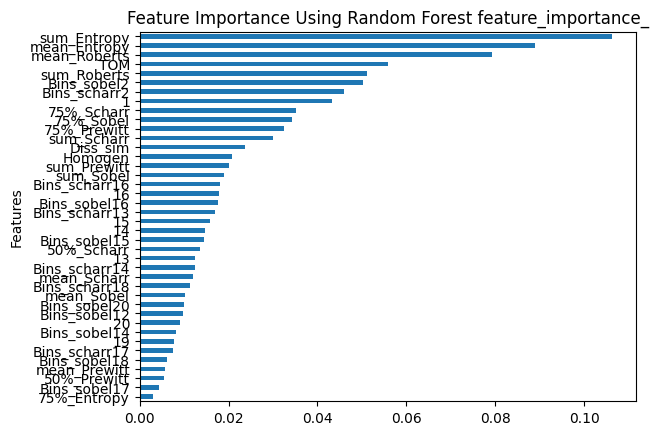

In [ ]:

feature_importance.sort_values().plot(kind='barh')

plt.title("Feature Importance Using Random Forest feature_importance_")
plt.ylabel('Features')

In [ ]:
sorted_imp = abs(feature_importance).sort_values(ascending=False)

In [ ]:
colums_use = sorted_imp.index[0:40]

In [ ]:
df5 = df4[colums_use]

In [ ]:
y_data = df4.iloc[:, -1]

In [ ]:
df6 = pd.concat([df5.reset_index(drop=True), y_data.reset_index(drop=True)],axis=1)

In [ ]:
df6

,sum_Entropy,mean_Entropy,mean_Roberts,TOM,sum_Roberts,Bins_sobel2,Bins_scharr2,1,75%_Scharr,75%_Sobel,...,20,Bins_sobel14,19,Bins_scharr17,Bins_sobel18,mean_Prewitt,50%_Prewitt,Bins_sobel17,75%_Entropy,label
0,0.693232,0.721593,0.639729,0.565789,0.656628,0.104635,0.104635,0.112052,0.748634,0.707107,...,0.714286,0.648352,0.805195,0.700337,0.733333,0.707619,0.707107,0.700337,0.900799,2.0
1,0.606505,0.599714,0.490855,0.585526,0.517448,0.242613,0.242613,0.254168,0.567819,0.565685,...,0.554622,0.538462,0.580087,0.572391,0.625926,0.568323,0.559017,0.572391,0.900799,2.0
2,0.463843,0.354416,0.283972,0.148026,0.267849,0.414747,0.414747,0.430172,0.401508,0.400000,...,0.147059,0.285714,0.138528,0.252525,0.185185,0.357162,0.353553,0.252525,0.637974,0.0
3,0.316965,0.339837,0.260778,0.233553,0.248488,0.389536,0.389536,0.417054,0.401508,0.400000,...,0.273109,0.335165,0.294372,0.299663,0.344444,0.293045,0.353553,0.299663,0.637974,0.0
4,0.332953,0.358712,0.288210,0.217105,0.270838,0.349688,0.349688,0.341350,0.401508,0.400000,...,0.323529,0.321429,0.380952,0.356902,0.303704,0.346682,0.250000,0.356902,0.637974,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,0.782409,0.671585,0.564223,0.398026,0.542054,0.207102,0.207102,0.208254,0.577714,0.565685,...,0.466387,0.568681,0.528139,0.552189,0.544444,0.583335,0.559017,0.552189,0.900799,2.0
7559,0.625822,0.617188,0.660915,0.585526,0.701085,0.207644,0.207644,0.204154,0.797509,0.761577,...,0.563025,0.412088,0.636364,0.457912,0.603704,0.745809,0.750000,0.457912,0.900799,0.0
7560,0.264528,0.315620,0.292397,0.108553,0.288968,0.490648,0.490648,0.509429,0.401508,0.400000,...,0.226891,0.203297,0.354978,0.249158,0.303704,0.374713,0.250000,0.249158,0.474351,0.0
7561,0.502530,0.459714,0.394124,0.391447,0.368721,0.380320,0.380320,0.353375,0.473478,0.447214,...,0.348739,0.461538,0.359307,0.424242,0.351852,0.483873,0.353553,0.424242,0.637974,2.0


In [ ]:
X = df6.iloc[:, 0:-1]
y = df6.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)


In [ ]:
embedding_tsne = TSNE(n_components=2)
X_train_tnse = embedding_tsne.fit_transform(X_train)

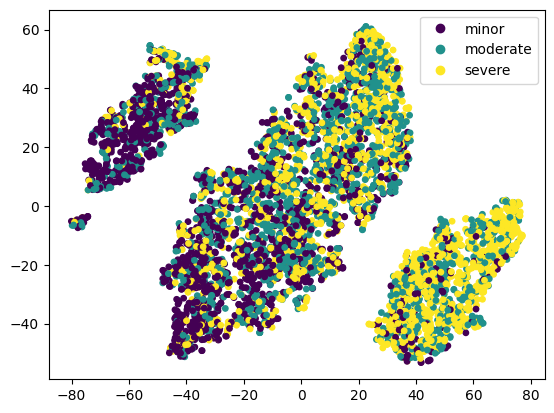

In [ ]:

labels = ['minor', 'moderate', 'severe']
plot = plt.scatter(X_train_tnse[:,0], X_train_tnse[:,1], c=y_train, s=15)
plt.legend(handles=plot.legend_elements()[0], labels=labels)
plt.show()

In [ ]:
param_grid = { 
    'max_depth' : range(1,6),
    'criterion' :['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split':[2,3, 4, 5,],
    'min_samples_leaf': [2, 3, 4, 5, 6,]
    oob_score: [True, False]
}

rf = RandomForestClassifier()
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train)
cv_rf.best_params_

In [ ]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features=None, min_samples_split=5, min_samples_leaf=6, oob_score=True)
rf.fit(X_train, y_train)
pred=rf.predict(X_test)

In [ ]:
print('Results for Random Forest Feature Selection on Histogram/Statistics:\n')
print('Testing')
print("Accuracy: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))
pred_train=rf.predict(X_train)
print('Training')
print("Accuracy: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Results for Random Forest Feature Selection on Histogram/Statistics:

Testing
Accuracy:  0.5434111943587483
Classification Report
               precision    recall  f1-score   support

         0.0       0.59      0.68      0.63       727
         1.0       0.44      0.33      0.38       749
         2.0       0.57      0.62      0.59       793

    accuracy                           0.54      2269
   macro avg       0.53      0.54      0.53      2269
weighted avg       0.53      0.54      0.53      2269

Training
Accuracy:  0.5986021911598035
Classification Report
               precision    recall  f1-score   support

         0.0       0.63      0.71      0.67      1752
         1.0       0.53      0.40      0.46      1773
         2.0       0.61      0.68      0.64      1769

    accuracy                           0.60      5294
   macro avg       0.59      0.60      0.59      5294
weighted avg       0.59      0.60      0.59      5294



In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
log_grid = LogisticRegression()
cv = GridSearchCV(estimator=log_grid, param_grid=param_grid, cv= 5)
cv.fit(X_train, y_train)

cv.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Logistics Regression

In [ ]:
log = LogisticRegression(max_iter=2500, solver = 'lbfgs', penalty = 'l2')
log.fit(X_train,y_train)

LogisticRegression(max_iter=2500)

In [ ]:
pred=log.predict(X_test)

In [ ]:
print('Results for Logistic Regression on Histogram/Statistics:\n')
print('Testing')
print("Accuracy: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))
pred_train=log.predict(X_train)
print('Training')
print("Accuracy: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Results for Logistic Regression on Histogram/Statistics:

Testing
Accuracy:  0.5403261348611723
Classification Report
               precision    recall  f1-score   support

         0.0       0.58      0.67      0.62       727
         1.0       0.44      0.36      0.39       749
         2.0       0.57      0.60      0.58       793

    accuracy                           0.54      2269
   macro avg       0.53      0.54      0.53      2269
weighted avg       0.53      0.54      0.53      2269

Training
Accuracy:  0.5430676237249716
Classification Report
               precision    recall  f1-score   support

         0.0       0.60      0.67      0.63      1752
         1.0       0.45      0.34      0.39      1773
         2.0       0.55      0.62      0.59      1769

    accuracy                           0.54      5294
   macro avg       0.53      0.54      0.53      5294
weighted avg       0.53      0.54      0.53      5294



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
pred=nb.predict(X_test)

In [ ]:
print('Results for Naive Bayes on Histogram/Statistics:\n')
print('Testing')
print("Accuracy: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))
pred_train=nb.predict(X_train)
print('Training')
print("Accuracy: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Results for Naive Bayes on Histogram/Statistics:

Testing
Accuracy:  0.5125605993829881
Classification Report
               precision    recall  f1-score   support

         0.0       0.53      0.70      0.60       727
         1.0       0.41      0.27      0.33       749
         2.0       0.56      0.57      0.56       793

    accuracy                           0.51      2269
   macro avg       0.50      0.51      0.50      2269
weighted avg       0.50      0.51      0.50      2269

Training
Accuracy:  0.5132225160559124
Classification Report
               precision    recall  f1-score   support

         0.0       0.55      0.71      0.62      1752
         1.0       0.41      0.26      0.32      1773
         2.0       0.54      0.57      0.55      1769

    accuracy                           0.51      5294
   macro avg       0.50      0.51      0.50      5294
weighted avg       0.50      0.51      0.50      5294



In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [ ]:
svm_grid = SVM()
cv = GridSearchCV(estimator=svm_grid, param_grid=param_grid, cv= 5)
cv.fit(X_train, y_train)

cv.best_params_

SVM

In [ ]:
from sklearn import svm


In [ ]:
clf = svm.SVC(C=1000, gamma = .01)
clf.fit(X_train, y_train)

SVC(C=1000, gamma=0.01)

In [ ]:
pred=clf.predict(X_test)

In [ ]:
print('Results for SVM on Histogram/Statistics:\n')
print('Testing')
print("Accuracy: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))
pred_train=clf.predict(X_train)
print('Training')
print("Accuracy: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Results for SVM on Histogram/Statistics:

Testing
Accuracy:  0.5376817981489643
Classification Report
               precision    recall  f1-score   support

         0.0       0.57      0.66      0.62       727
         1.0       0.43      0.35      0.39       749
         2.0       0.58      0.60      0.59       793

    accuracy                           0.54      2269
   macro avg       0.53      0.54      0.53      2269
weighted avg       0.53      0.54      0.53      2269

Training
Accuracy:  0.5527011711371363
Classification Report
               precision    recall  f1-score   support

         0.0       0.61      0.67      0.64      1752
         1.0       0.46      0.36      0.40      1773
         2.0       0.56      0.63      0.60      1769

    accuracy                           0.55      5294
   macro avg       0.54      0.55      0.55      5294
weighted avg       0.54      0.55      0.55      5294



Information gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [ ]:
X = df4.iloc[:, 0:-1]
y = df4.iloc[:, -1]

In [ ]:

selector = SelectKBest(mutual_info_classif, k=40)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape


(7563, 40)

In [ ]:

cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()

In [ ]:
df7 = df4[selected_columns]

In [ ]:
df8 = pd.concat([df7.reset_index(drop=True), y_data.reset_index(drop=True)],axis=1)

In [ ]:
df8

,1,12,13,14,15,16,17,19,20,Bins_scharr2,...,sum_Roberts,mean_Scharr,50%_Scharr,75%_Scharr,sum_Scharr,mean_Prewitt,50%_Prewitt,75%_Prewitt,sum_Prewitt,label
0,0.112052,0.628713,0.619647,0.720497,0.677741,0.671924,0.687943,0.805195,0.714286,0.104635,...,0.656628,0.690227,0.715542,0.748634,0.711653,0.707619,0.707107,0.707107,0.736095,2.0
1,0.254168,0.537129,0.559194,0.599379,0.578073,0.542587,0.489362,0.580087,0.554622,0.242613,...,0.517448,0.552890,0.596657,0.567819,0.565151,0.568323,0.559017,0.571772,0.593607,2.0
2,0.430172,0.173267,0.261965,0.251553,0.279070,0.154574,0.191489,0.138528,0.147059,0.414747,...,0.267849,0.340181,0.189737,0.401508,0.334180,0.357162,0.353553,0.416025,0.390849,0.0
3,0.417054,0.346535,0.400504,0.347826,0.338870,0.340694,0.290780,0.294372,0.273109,0.389536,...,0.248488,0.286059,0.189737,0.401508,0.300544,0.293045,0.353553,0.416025,0.351572,0.0
4,0.341350,0.376238,0.249370,0.326087,0.418605,0.328076,0.365248,0.380952,0.323529,0.349688,...,0.270838,0.337184,0.189737,0.401508,0.336608,0.346682,0.250000,0.416025,0.367763,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,0.208254,0.589109,0.528967,0.627329,0.631229,0.539432,0.507092,0.528139,0.466387,0.207102,...,0.542054,0.576735,0.596657,0.577714,0.577953,0.583335,0.559017,0.571772,0.603022,2.0
7559,0.204154,0.403465,0.362720,0.425466,0.524917,0.435331,0.429078,0.636364,0.563025,0.207644,...,0.701085,0.710983,0.715542,0.797509,0.724756,0.745809,0.750000,0.808608,0.772079,0.0
7560,0.509429,0.264851,0.241814,0.214286,0.229236,0.170347,0.312057,0.354978,0.226891,0.490648,...,0.288968,0.351772,0.189737,0.401508,0.354696,0.374713,0.250000,0.416025,0.394713,0.0
7561,0.353375,0.428218,0.420655,0.465839,0.451827,0.406940,0.329787,0.359307,0.348739,0.380320,...,0.368721,0.469799,0.447214,0.473478,0.462615,0.483873,0.353553,0.438529,0.448546,2.0


In [ ]:
X = df8.iloc[:, 0:-1]
y = df8.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)


In [ ]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features=None, min_samples_split=4, min_samples_leaf=6, oob_score=True)
rf.fit(X_train, y_train)
pred=rf.predict(X_test)

In [ ]:
print('Testing')
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))
pred_train=rf.predict(X_train)
print('Training')
print("Accuracy for Random Forest: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))

Testing
Accuracy for Random Forest:  0.5398854120758043
Classification Report
               precision    recall  f1-score   support

         0.0       0.57      0.67      0.62       727
         1.0       0.45      0.33      0.38       749
         2.0       0.57      0.62      0.59       793

    accuracy                           0.54      2269
   macro avg       0.53      0.54      0.53      2269
weighted avg       0.53      0.54      0.53      2269

Training
Accuracy for Random Forest:  0.5816018133736305
Classification Report
               precision    recall  f1-score   support

         0.0       0.61      0.70      0.65      1752
         1.0       0.52      0.38      0.44      1773
         2.0       0.59      0.67      0.63      1769

    accuracy                           0.58      5294
   macro avg       0.57      0.58      0.57      5294
weighted avg       0.57      0.58      0.57      5294



SVD (SVD using np doesn not give good results)

In [ ]:
X = df4.iloc[:, 0:-1]
y = df4.iloc[:, -1]

In [ ]:
y

0       2.0
1       2.0
2       0.0
3       0.0
4       1.0
       ... 
7558    2.0
7559    0.0
7560    0.0
7561    2.0
7562    2.0
Name: label, Length: 7563, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)


In [ ]:
y_train

709     2.0
4757    2.0
5520    0.0
6827    1.0
2952    2.0
       ... 
4060    2.0
1346    1.0
3454    2.0
7533    2.0
3582    1.0
Name: label, Length: 5294, dtype: float64

In [ ]:
U, s, Vt = np.linalg.svd(X_train, full_matrices=False)
S = np.diag(s)

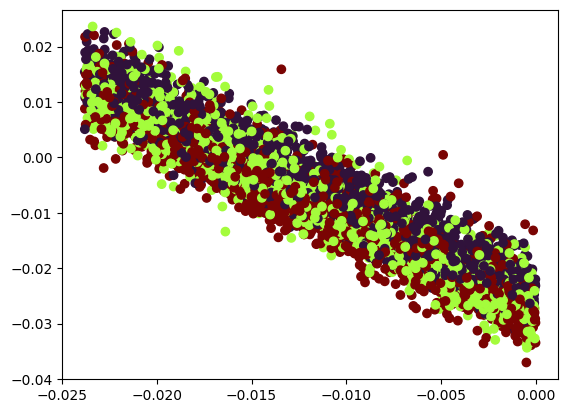

In [ ]:
plt.scatter(U[:, 0], U[:, 1], c=y_train)
plt.show()

In [ ]:
y_train

709     2.0
4757    2.0
5520    0.0
6827    1.0
2952    2.0
       ... 
4060    2.0
1346    1.0
3454    2.0
7533    2.0
3582    1.0
Name: label, Length: 5294, dtype: float64

In [ ]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= 20, max_features=None, min_samples_split=2, min_samples_leaf=2, oob_score=True)
rf.fit(U, y_train)
pred=rf.predict(X_test)

In [ ]:
print('Testing')
print("Accuracy for Random Forest: ",accuracy_score(y_test,pred))
print('Classification Report\n', classification_report(y_test,pred))
pred_train=rf.predict(X_train)
print('Training')
print("Accuracy for Random Forest: ",accuracy_score(y_train,pred_train))
print('Classification Report\n', classification_report(y_train,pred_train))